In [64]:
#Gregory Krulin
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.special import gamma
from time import time


## Problem 1.
The *gamma function* is defined by
$$
    \Gamma(x) = \int_0^{\infty} t^{x-1}e^{-t}\,dt,\quad x>0.
$$
For an integer argument $n$, the gamma function has the value
$$
    \Gamma(n) = (n-1)!
$$
so interpolating the data points
$$
\begin{matrix}
t & 1 & 2 & 3 & 4 & 5\cr
y & 1 & 1 & 2 & 6 & 24\cr
\end{matrix}
$$
should yield an approximation to the gamma function over the given range.

1. Compute the polynomial of degree four that interpolates these five data points. Plot the resulting polynomial as well as the corresponding values given by the gamma function in the `math` module over the domain $[1,5]$.
2. Use a cubic spline routine to interpolate the same data and again plot the resulting curve along with `math.gamma`.
3. Which of the two interpolants is more accurate over most of the domain?
4. Which of the two interpolants is more accurate between 1 and 2?

In [9]:
help(math.gamma)

Help on built-in function gamma in module math:

gamma(...)
    gamma(x)
    
    Gamma function at x.



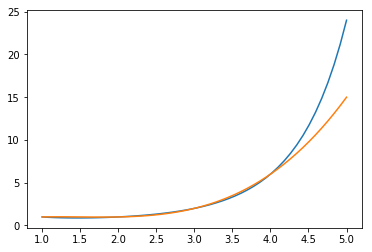

In [46]:
t = np.linspace(1,5)
g = []
for x in t:
    g.append(math.gamma(x))
    
x = np.array([1,2,3,4])
y = np.zeros(x.size)
for z in x:
    y[z-1] = (math.gamma(z))

def interpNrecursive(x,y):
    c = np.empty(x.size)
    c[0] = y[0]
    if x.size>1:
        c[1:] = interpNrecursive(x[1:],(y[1:]-y[0])/(x[1:]-x[0]))
    return c

def hornerN(t,x,c):
    result = c[-1]
    for xk,ck in zip(x[-2::-1],c[-2::-1]):
        result = result*(t-xk)+ck
    return result

c = interpNrecursive(x,y)


plt.plot(t, g, t, hornerN(t,x,c))

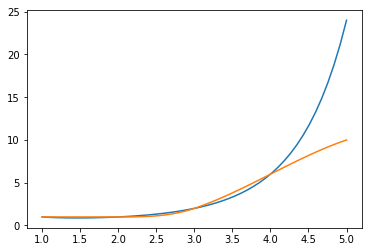

In [37]:
t = np.linspace(1,5)
g = []
for x in t:
    g.append(math.gamma(x))
    
def locate(t,x,g=0):
    if x[g]<=t and t<=x[g+1]:
        return g
    left = 0
    right = len(x)-1
    while right>left+1:
        mid = (right+left)//2
        if t >= x[mid]:
            left = mid
        else:
            right = mid
    return left

def pwC(x,y,s):
    s = np.array(s)
    y = np.array(y)
    dx = np.diff(x)
    dy = np.diff(y)
    yp = dy/dx
    a = y[:-1]
    b = s[:-1]
    c = (yp-s[:-1])/dx
    d = (s[:-1]+s[1:]-2*yp)/(dx*dx)
    return [a,b,c,d]

def pwCEval(t,x,coef):
    ta = np.array(t)
    a,b,c,d = coef
    result = np.empty(ta.size)
    i = 0
    for tk,k in zip(ta,range(ta.size)):
        i = locate(tk,x,i)
        result[k] = d[i]*(tk-x[i+1])+c[i]
        result[k] = result[k]*(tk-x[i])+b[i]
        result[k] = result[k]*(tk-x[i])+a[i]
    return result

def MyCubicSpline(x,y,der=3,muL=0,muR=0):
    y = np.array(y)
    dx = np.diff(x)
    dy = np.diff(y)
    yp = dy/dx
    A = np.diag(2*(dx[1:]+dx[:-1]))+np.diag(dx[2:],-1)+np.diag(dx[:-2],1)
    b = 3*(dx[:-1]*yp[1:]+dx[1:]*yp[:-1])
    if der == 1:
        b[0]  -= dx[1]*muL
        b[-1] -= dx[-2]*muR
        s = np.linalg.solve(A,b)
        s = np.hstack((muL,s,muR))
    elif der == 2:
        bd1 = (6*yp[0]-muL*dx[0])/4
        b[0] -= dx[1]*bd1
        A[0,0] -= dx[1]/2
        bdn = (6*yp[-1]-muL*dx[-1])/4
        b[-1] -= dx[-2]*bdn
        A[-1,-1] -= dx[-2]/2
        s = np.linalg.solve(A,b)
        s = np.hstack((bd1-s[0]/2,s,bdn-s[-1]/2))
    elif der==3:
        q = dx[0]*dx[0]/dx[1]
        b[0] -= 2*(yp[0]*dx[1]-yp[1]*q)
        A[0,0] += q-dx[1]
        A[0,1] += q
        q = dx[-1]*dx[-1]/dx[-2]
        b[-1] -= 2*(yp[-1]*dx[-2]-yp[-2]*q)
        A[-1,-1] += q-dx[-2]
        A[-1,-2] += q
        s = np.linalg.solve(A,b)
        sL = 2*yp[0]-s[0]+((dx[0]/dx[1])**2)*(s[0]+s[1]-2*yp[1])
        sR = 2*yp[-1]-s[-1]+((dx[-1]/dx[-2])**2)*(s[-1]+s[-2]-2*yp[-2])
        s = np.hstack((sL,s,sR))
    else:
        print('d must be one of 1, 2 or 3')
        return None
    a = y[:-1]
    b = s[:-1]
    c = (yp-s[:-1])/dx
    d = (s[:-1] + s[1:]-2*yp)/(dx*dx)
    return a,b,c,d

x = [1,2,3,4]
y = []
for z in x:
    y.append(math.gamma(z))
    
coef = MyCubicSpline(x,y,der=2,muL=0,muR=0)

plt.plot(t, g,t, pwCEval(t,x,coef))

3. The polynomial interpolation method is more accurate for the most the domain.
4. For the range of [1,2] the cubic spline interpolation is more accurate.

## Problem 2. and 3.
Problems 10.8.18 and 15.7.7 from the text.

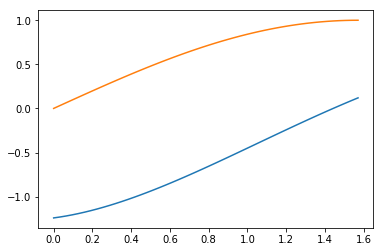

In [61]:
#10.8.18 (a) Interpolate the sinx function from [0,pi/2]

pts = np.array([0,np.pi/6,np.pi/4,np.pi/3,np.pi/2])
y = np.zeros(pts.size)
for z in range(0,pts.size):
    y[z] = np.sin(pts[z])
    

def interpNrecursive(x,y):
    c = np.empty(x.size)
    c[0] = y[0]
    if x.size>1:
        c[1:] = interpNrecursive(x[1:],(y[1:]-y[0])/(x[1:]-x[0]))
    return c

def hornerN(t,x,c):
    result = c[-1]
    for xk,ck in zip(x[-2::-1],c[-2::-1]):
        result = result*(t-xk)+ck
    return result

c = interpNrecursive(pts,y)

x = np.linspace(0,np.pi/2)
p = np.polynomial.Chebyshev.fit(x, np.sin(x), 5)
t = np.linspace(0,np.pi/2)

plt.plot(t, hornerN(t,x,c), t, p(t))

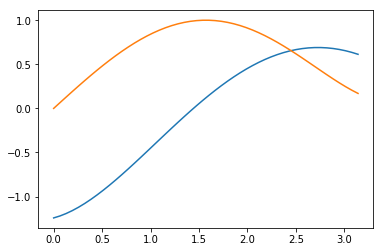

In [60]:
#10.8.18 (b) Repeat (a) but over interval [0, pi]
pts = np.array([0,np.pi/6,np.pi/4,np.pi/3,np.pi/2])
y = np.zeros(pts.size)
for z in range(0,pts.size):
    y[z] = np.sin(pts[z])
    

def interpNrecursive(x,y):
    c = np.empty(x.size)
    c[0] = y[0]
    if x.size>1:
        c[1:] = interpNrecursive(x[1:],(y[1:]-y[0])/(x[1:]-x[0]))
    return c

def hornerN(t,x,c):
    result = c[-1]
    for xk,ck in zip(x[-2::-1],c[-2::-1]):
        result = result*(t-xk)+ck
    return result

c = interpNrecursive(pts,y)

x = np.linspace(0,np.pi/2)
p = np.polynomial.Chebyshev.fit(x, np.sin(x), 5)
t = np.linspace(0,np.pi)

plt.plot(t, hornerN(t,x,c), t, p(t))

#go over these two cells, review notes of chebyshev polynomials. Does he want us to do numpy
#or to create our own method?

15.7.7 Use composite trapezoidal, midpoint and simpson methods to integrate the integrals below.

(a) $\int_0^1\frac{4}{1+x^2}dx$

(b) $\int_0^1\sqrt{x}dx$


In [62]:
def NCweights(m):
    """
    NCweights(m)
        m is an integer that satisfies 2 <= m <= 13.
        returns a numpy array consisting of the weights for the m-point Newton-Cotes rule.
    Based on Matlab code of Charles Van Loan from Introduction to Scientific Computing: A
    Matrix-Vector Approach Using Matlab.
    """
    if m==2:
        return np.array([1,1])/2
    elif m==3:
        return np.array([1,4,1])/6
    elif m==4:
        return np.array([1,3,3,1])/8
    elif m==5:
        return np.array([7,32,12,32,7])/90
    elif m==6:
        return np.array([19,75,50,50,75,19])/288
    elif m==7:
        return np.array([41,216,27,272,27,216,41])/840
    elif m==8:
        return np.array([751,3577,1323,2989,2989,1323,3577,751])/17280
    elif m==9:
        return np.array([989,5888,-928,10496,-4540,10496,-928,5888,989])/28350
    elif m==10:
        return np.array([2857,15741,1080,19344,5778,5778,19344,1080,15741,2857])/89600
    elif m==11:
        return np.array([16067,106300,-48525,272400,-260550,427368,-260550,272400,-48525,106300,16067])/598752
    # Additional
    elif m==12:
        return np.array([2171465,13486539,-3237113,25226685,-9595542,15493566,
                    15493566,-9595542,25226685,-3237113,13486539,2171465])/87091200
    elif m==13:
        return np.array([1364651,9903168,-7587864,35725120,-51491295,87516288,
                    -87797136,87516288,-51491295,35725120,-7587864,9903168,
                    1364651])/63063000
    else:
        return None
    
def QNC(f,a,b,m=3):
    t = np.linspace(a,b,m)
    return (b-a)*f(t).dot(NCweights(m))

def NCOpenWeights(m):
    """
    NCOpenWeights(m)

        returns a numpy array consisting of the weights for the m-point open
        Newton-Cotes rule.
        m is an integer that satisfies 1 <= m <= 11.
    Based on Matlab code of Charles Van Loan from Introduction to Scientific Computing: A
    Matrix-Vector Approach Using Matlab.
    """
    if m==1:
        return np.array([1])
    elif m==2:
        return np.array([1,1])/2
    elif m==3:
        return np.array([2,-1,2])/3
    elif m==4:
        return np.array([11,1,1,11])/24
    elif m==5:
        return np.array([11,-14,26,-14,11])/20
    elif m==6:
        return np.array([611,-453,562,562,-453,611])/1440
    elif m==7:
        return np.array([460,-954,2196,-2459,2196,-954,460])/945
    # Additional
    elif m==8:
        return np.array([1787,-2803,4967,-1711,-1711,4967,-2803,1787])/4480
    elif m==9:
        return np.array([4045,-11690,33340,-55070,67822,-55070,33340,-11690,4045])/9072
    elif m==10:
        return np.array([2752477,-6603199,15673880,-17085616,8891258,8891258,-17085616,
                         15673880,-6603199,2752477])/7257600
    elif m==11:
        return np.array([9626,-35771,123058,-266298,427956,-494042,427956,-266298,123058,
                         -35771,9626])/23100
    else:
        return None
    


def NCerror(a,b,m,M=1):
    """
    NCerror(a,b,m,M)
    The error bound for the m-point Newton Cotes rule when applied to
    the integral from a to b of a function f(x). It is assumed that
    a<=b and 2<=m<=13. M is an upper bound for the (d+1)-st derivative of the 
    function f(x) on [a,b] where d = m if m is odd, and m-1 if m is even. 
    Based on Matlab code of Charles Van Loan from Introduction to Scientific Computing: A
    Matrix-Vector Approach Using Matlab.
    """
    d = int(np.floor((m+1)/2)*2-1)
    if m==2:
        c = -1/12
    elif m==3:   
        c = -1/90
    elif m==4:   
        c = -3/80
    elif m==5:
        c = -8/945
    elif m==6:
        c = -275/12096
    elif m==7:
        c = -9/1400
    elif m==8:
        c = -8183/518400
    elif m==9:
        c = -2368/467775
    elif m==10:
        # c = -4671/394240
        c = -173/14620
    elif m==11:
        c = -673175/163459296
    # Additional
    elif m==12:
        c = -2224234463/237758976000
    elif m==13:
        c = -3012/875875
    h = (b-a)/(m-1)
    return abs(c*M*h**(d+2)),c,d

def NCOpenError(a,b,m,M=1):
    """
    NCerror(a,b,m,M)
    The error bound for the m-point Newton Cotes rule when applied to
    the integral from a to b of a function f(x). It is assumed that
    a<=b and 1<=m<=11. M is an upper bound for the (d+1)-st derivative of the 
    function f(x) on [a,b] where d = m if m is odd, and m-1 if m is even. 
    Based on Matlab code of Charles Van Loan from Introduction to Scientific Computing: A
    Matrix-Vector Approach Using Matlab.
    """
    d = int(np.floor((m+1)/2)*2-1)
    if m==1:
        c = 1/3
    elif m==2:
        c = 3/4
        # c = 1/4
    elif m==3:   
        # c = 28/90 # same
        c = 14/45
    elif m==4:   
        c = 95/144
    elif m==5:
        c = 41/140
    elif m==6:
        c = 5257/8640
    elif m==7:
        c = 3956/14175
    # Additional
    elif m==8:
        c = 25713/44800
    elif m==9:
        c = 80335/299376
    elif m==10:
        c = 4777223/8709120
    elif m==11:
        c = 1364651/5255250
    h = (b-a)/(m+1)
    return abs(c*M*h**(d+2)),c,d

In [78]:
def f(x):
    return 4/(1+x**2)

def g(x):
    return np.sqrt(x)

def QNCOpen(f,a,b,m):
    x = np.linspace(a,b,m+2)[1:-1]
    w = NCOpenWeights(m)
    return (b-a)*f(x).dot(w)

def QNC(f,a,b,m=3):
    t = np.linspace(a,b,m)
    return (b-a)*f(t).dot(NCweights(m))

def CompQNC(f,a,b,m,n):
    x = np.linspace(a,b,(m-1)*n+1)
    y = f(x)
    w = NCweights(m)
    result = 0.0
    first = 0;
    last = m
    for i in range(n):
        result += w.dot(y[first:last])
        first = last-1
        last  = last+(m-1)
    return result * (b-a) / n


a = 0.0
b = 1
m = 3
n = 100
w = NCweights(m)
x = np.linspace(a,b,m)
fest = (f(x)*w).sum()*(b-a)
f1 = QNC(f,a,b,m)
f2 = CompQNC(f,a,b,m,n)
fo = QNCOpen(f,a,b,m)
gest = (g(x)*w).sum()*(b-a)
g1 = QNC(g,a,b,m)
g2 = CompQNC(g,a,b,m,n)
go = QNCOpen(g,a,b,m)
fest,f1,f2,fo

(3.1333333333333333, 3.1333333333333333, 3.1415926535897922, 3.149803921568627)

In [79]:
gest,g1,g2,go

(0.6380711874576983,
 0.6380711874576983,
 0.6666379635700301,
 0.6749813421274432)

## Problem 4.
Use a Monte-Carlo simulation to estimate fair price for a European call option to buy one share of a stock currently trading at $\$100$ for $\$95$ in one year.  Assume that the risk-free interest rate $r$ is $0.06$ and that the volatility factor $\sigma$ is $0.20$.

In [10]:

S0 = 100 # initial value
K  = 95 # strike price
T  =   1 # time to maturity
r  = 0.06 # risk-free interest rate.
σ  = 0.20 # volatility 

M = 50 # number of time steps in my simulation
dt = T / M # size of time step.
I = 50000 # number of paths to simulate

S = np.empty((M+1,I))
S[0] = S0
for t in range(1,M+1):
    z = np.random.standard_normal(I)
    S[t] = S[t-1]*np.exp((r-0.5*σ**2)*dt + σ*z*np.sqrt(dt))
    
C0 = np.exp(-r*T)*np.sum(np.maximum(S[-1]-K,0)) / I


print("European Option Value %7.3f" % C0)

European Option Value  13.943
